In [178]:
"""
branch desde VerMarquetBalnce-sql-2.7.ipynb 

no es continuacion
esta vercion no tiene el metodo OpenerCloserEvaluator

implemente la clase TradePloter completamante funcional y encapsulada para todos los graficos
implementa la clase DBAdapter que encasula los metodos de bbdd
implementa la clase TradeEvaluator que encapsula la apertuta cierre de operacioes en modo Backtest

este codiogo calcula la apertura cierre en una clase encapsulada y loego lee desde bbdd para el ploteo
con bbdd y plot encapsulados
se incorpora DBA.MytradesInsertOne(oTradeValues) desde TradeEvaluator
incorpora grabar operaciones en dos etapas, insert al abrir, update al cerrar
incorpora grabar en bbdd cada operacion al abrir y actualicar al cerrar, no todas al finalizar
incorporado calculo de entrada salida en una clase independiente que corra periodicamante online
incorporado script manl con multitread que ejecute lectura de dados y calculo de operaciones online 

prendiente:
    
"""

# imports
import numpy as np
import pandas as pd
import time
from datetime import datetime, timedelta
import IPython.core.debugger
dbg = IPython.core.debugger.Pdb()
#dbg.set_trace() #colocar dondo punto interrupcion
import matplotlib.pyplot as plt
%matplotlib inline

start = time.time()

In [179]:
%run "../Clases/DBAdapter.py"

In [180]:
DBA = DBAdapter()

        
BalanceHistory     = DBA.ReadBalanceHistory()
tradesCondensation = DBA.ReadCondensatedTrades()
#myTrades           = DBA.ReadMyTrades() lectura desde bbdd se pasa a la clase TradeEvaluator, luego de calcula+r las operacioens

In [181]:
%run "../Clases/TradeEvaluator.py"

In [182]:
TE = TradeEvaluator()
myTrades = TE.OpenerCloserEvaluator (BalanceHistory, tradesCondensation, DBA, pIsBackTest = True)

EMPLEANDO LOS SIGUIETNES PARAMETROS:
volPriceOpen       50000
chOpen             0.4
mbOpen             1.05
deltaCHObjetivo    20
chClose            1
deltaTotalLoseCH   5
waitPeriods        60
waitFactor         48
waitPeriodsOutBase 60
waitFactorOutBase  3
cumCHIncrement     2.5
deltaCHSaveProfit  9
UpTrendWaitPeriods 20
sqlite:///C:\_ajemicv\Python\Kraken_Trader\BBDD\krakenTrader.db
Total Trades: 9


In [183]:
%run "../Clases/TradePloter.py"

Total Trades: 9
total win: -5.1, total commiciones: 7.9, Balance Final -13.0


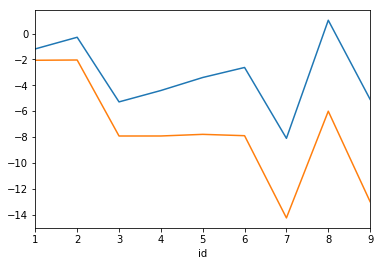

In [184]:
tp = TradePloter(TE.deltabaseCH, DBA.windowTime)
tp.plotProfit(myTrades)

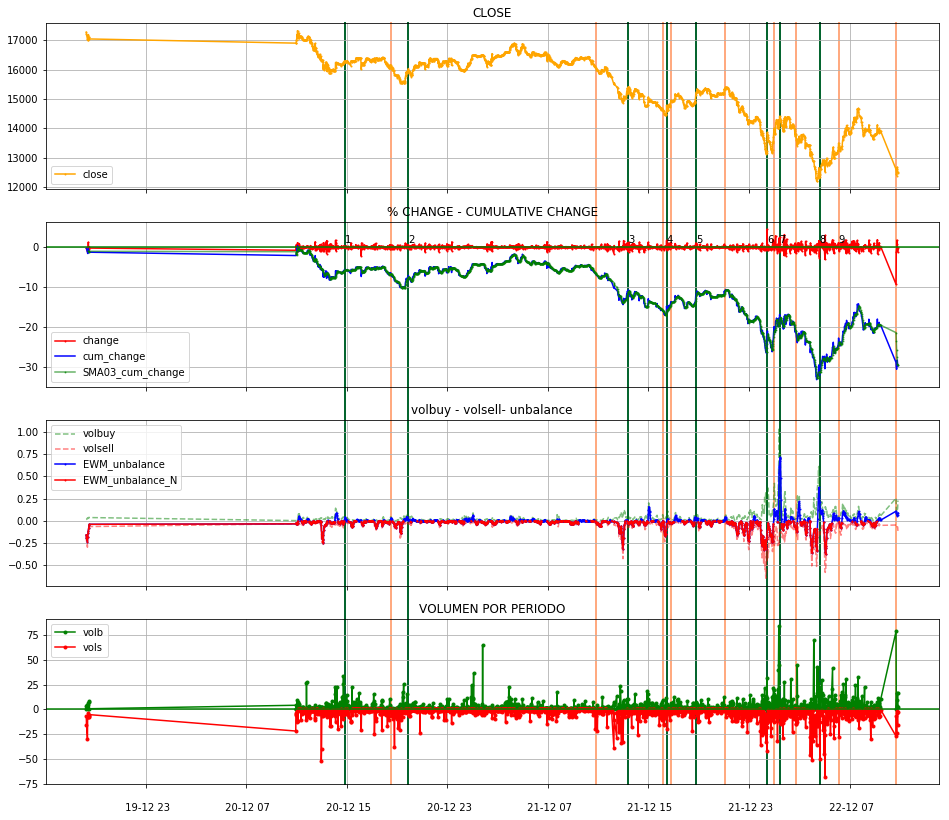

In [185]:
tp.plotHistory(BalanceHistory, myTrades,tradesCondensation, plotVolume= True, plotTrades=True)


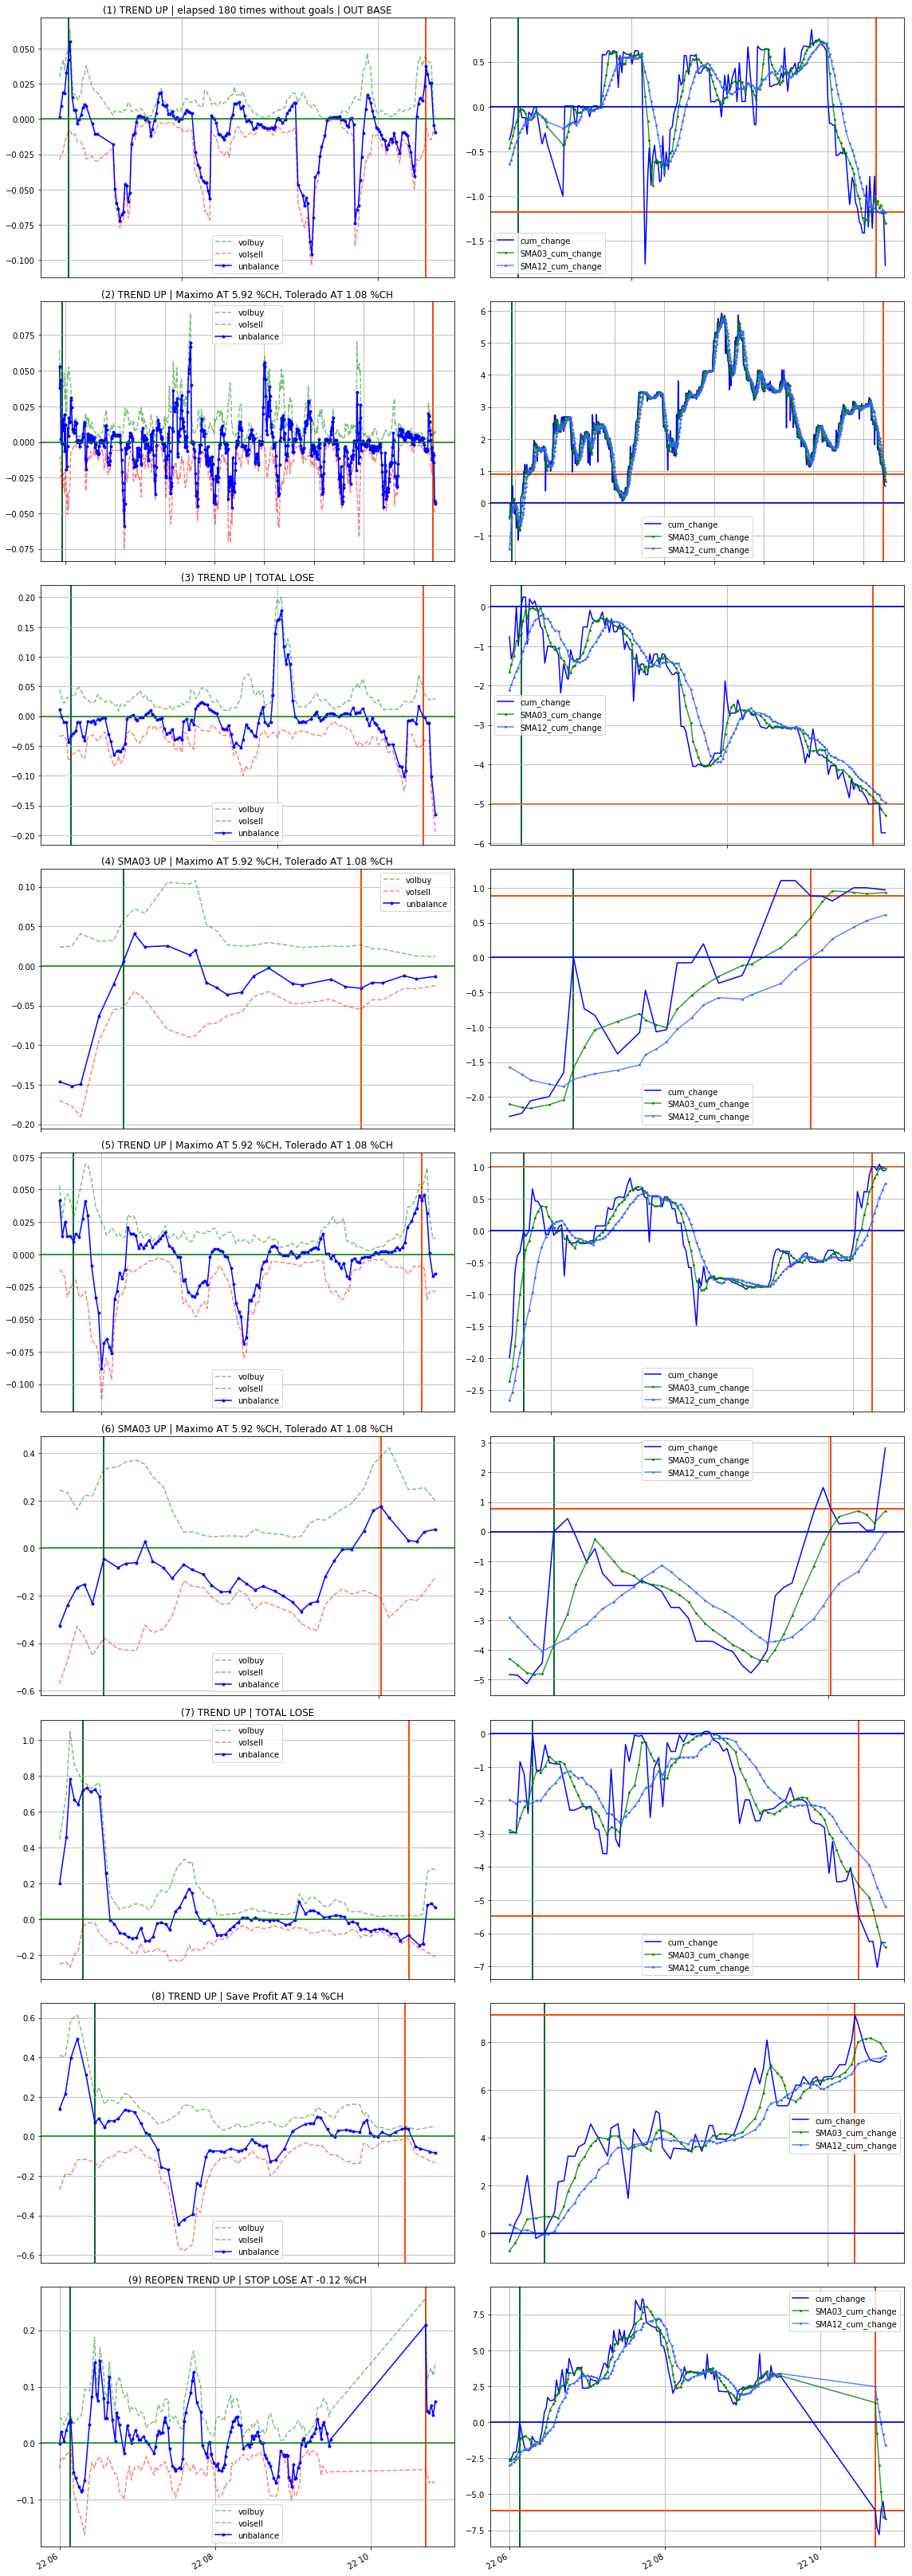

In [186]:
tp.plotAllTrades(BalanceHistory, myTrades)

In [187]:
myTrades

,openTime,closeTime,tradeDescription,OpeningTypeID,ClosingTypeID,openingCH,baseCH,targetCH,stopLoseCH,TotalLoseCH,...,deltaCH,openingP,baseP,targetP,stopLoseP,TotalLoseP,closingP,deltaP,Profit,Profit_Gastos
id,,,,,,,,,,,,,,,,,,,,,
1,2017-12-20 14:50:32.786514,2017-12-20 18:29:38.915430,(1) TREND UP | elapsed 180 times without goals...,6,5,-5.651974,-4.771974,15.228026,-5.771974,-10.651974,...,-1.181140,16296.688000,16440.098854,19699.436454,16277.131974,17111.522400,16107.941176,-188.746824,-1.181140,-2.061140
2,2017-12-20 19:51:44.150137,2017-12-21 10:47:38.420705,"(2) TREND UP | Maximo AT 5.92 %CH, Tolerado AT...",6,1,-7.695450,-6.815450,13.184550,-7.815450,-12.695450,...,0.899997,15960.916667,16101.372733,19293.556067,15941.763567,16758.962500,16087.586207,126.669540,-0.281143,-2.041143
3,2017-12-21 13:21:41.781395,2017-12-21 16:09:41.820941,(3) TREND UP | TOTAL LOSE,6,4,-11.069049,-10.189049,9.810951,-11.189049,-16.069049,...,-5.002135,15342.410909,15477.424125,18545.906307,15324.000016,16109.531455,14610.785366,-731.625543,-5.283278,-7.923278
4,2017-12-21 16:26:28.656528,2017-12-21 16:49:31.418618,"(4) SMA03 UP | Maximo AT 5.92 %CH, Tolerado AT...",4,1,-14.807500,-13.927500,6.072500,-14.927500,-19.807500,...,0.881673,14653.975556,14782.930540,17713.725652,14636.390785,15386.674333,14946.760000,292.784444,-4.401605,-7.921605
5,2017-12-21 18:49:02.422776,2017-12-21 21:07:32.993113,"(5) TREND UP | Maximo AT 5.92 %CH, Tolerado AT...",6,1,-11.693269,-10.813269,9.186731,-11.813269,-16.693269,...,1.006549,15216.320000,15350.223616,18393.487616,15198.060416,15977.136000,15395.966667,179.646667,-3.395055,-7.795055
6,2017-12-22 00:26:29.029815,2017-12-22 01:00:19.134931,"(6) SMA03 UP | Maximo AT 5.92 %CH, Tolerado AT...",4,1,-21.453845,-20.573845,-0.573845,-21.573845,-26.453845,...,0.776116,13671.189954,13791.496426,16525.734417,13654.784526,14354.749452,13953.562500,282.372546,-2.618939,-7.898939
7,2017-12-22 01:26:16.936032,2017-12-22 02:46:01.821712,(7) TREND UP | TOTAL LOSE,6,4,-16.936354,-16.056354,3.943646,-17.056354,-21.936354,...,-5.483464,14260.965455,14386.461951,17238.655041,14243.852296,14974.013727,13746.572464,-514.392991,-8.102403,-14.262403
8,2017-12-22 04:38:28.934624,2017-12-22 06:07:54.267504,(8) TREND UP | Save Profit AT 9.14 %CH,6,6,-31.940171,-31.060171,-11.060171,-32.060171,-36.940171,...,9.138466,12335.383916,12443.935295,14911.012078,12320.581455,12952.153112,13327.384000,992.000084,1.036063,-6.003937
9,2017-12-22 06:07:54.267504,2017-12-22 10:42:13.515919,(9) REOPEN TREND UP | STOP LOSE AT -0.12 %CH,7,2,-22.801705,-21.921705,-1.921705,-22.921705,-27.801705,...,-6.124142,13327.384000,13444.664979,16110.141779,13311.391139,13993.753200,12607.769947,-719.614053,-5.088080,-13.008080


In [188]:
done = time.time()
elapsed = (done - start)/60
print('{0} minutes'.format(round(elapsed,2)))

0.19 minutes
